  #                  Simple Linear Regression Using Python and Numpy

### All we need, to predict in Simple linear regression is the equation 
 >> ## Y = (Intercept) + (slope) * X 
 
### For the best equation, we need best  Intercept and slope values. To get them follow the steos described below




### Steps:
1. Initialise the parameters
2. Repeat until convergence or given number of iterations<br>
    i.Calculate Predicted values for dependent variable as per current parameters (y_hat)<br>
    ii.Calculate loss (cost function)<br>
    iii.Calculate Gradients (derivatives of cost function wrt parameters)<br>
    iV.Update the parameters<br>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.Initialising the parameters

In [2]:
def initialize(dim):
    w = np.zeros((dim,1))
    assert(w.shape == (dim,1))
    return w

In [3]:
initialize(2)

array([[0.],
       [0.]])

## 2.Calculating Y_hat and cost Function

In [4]:
def calc_yhat(w,X):
    y_hat = np.dot(w.T,X)
    return y_hat

In simple, **"Cost function is a measure of how wrong the model is in estimating the relationship between X(input) and Y(output) Parameter."** A cost function is sometimes also referred to as Loss function, and it can be estimated by iteratively running the model to compare estimated predictions against the known values of Y. We need to minimise thecost function for better values.

In [5]:
def calc_cost(w,y_hat,Y):
    m = Y.shape[1]
    cost = 1/m * np.sum(np.power(y_hat-Y,2))
    return cost

## 3.Calculating gradients and Optimization

In [6]:
def calc_gradient(w,X,Y):
    m = X.shape[1]
    y_hat = calc_yhat(w,X)
    grad = 2/m * np.dot(X, (y_hat-Y).T)
    return grad

**Gradient descent** is an iterative process where the model gradually converges towards a minimum value, and if the model iterates further than this point, it produces little or zero changes in the loss. This point is known as convergence, and at this point, the error is least, and the cost function is optimized.

In [7]:
def gradient_descent(X,Y,learning_rate, epochs, details):
    costs = []
    w = initialize(X.shape[0])
    for i in range(epochs):
        y_hat = calc_yhat(w,X)
        cost = calc_cost(w,y_hat,Y)
        grad = calc_gradient(w,X,Y)
        w = w - learning_rate * grad
        if i % details == 0:
            costs.append(cost)
            print('Cost after {} iterations is {}'.format(i,cost))
    return w, costs

## 4.Combining all functions to create a model

In [8]:
def run_model(X,Y,learning_rate, epochs, details):
    '''Input shape:
       X : (1,M)
       Y : (1,M)
       details : epoch interval after which cost is to be printed
       '''
    ones = np.ones((1, X.shape[1]))
    X = np.append(ones,X,axis = 0)     # To match with both b0 and b1 in w (Y= b0 + b1*x)
    w,costs = gradient_descent(X,Y,learning_rate, epochs, details)
    d = {
        'Intercept' : w[0,0],
        'Slope' : w[1,0],
        'Costs' : costs
    }
    return d

### Take a random sample data to fit the model

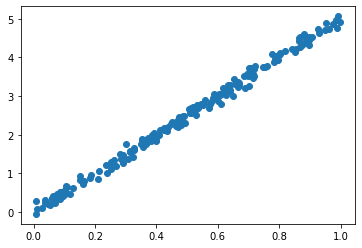

In [55]:
X = np.random.rand(1,200)
Y = 5*X + np.random.randn(1,200)*0.1
plt.scatter(X,Y)

In [142]:
#Fitting the model 

In [56]:
result = run_model(X,Y,0.01,1000,100)

Cost after 0 iterations is 8.174926370575834
Cost after 100 iterations is 0.9688773694199777
Cost after 200 iterations is 0.7351113828289292
Cost after 300 iterations is 0.5826637224722252
Cost after 400 iterations is 0.4623793426162286
Cost after 500 iterations is 0.3673229327410848
Cost after 600 iterations is 0.2922023926452975
Cost after 700 iterations is 0.23283663236183194
Cost after 800 iterations is 0.18592145454407324
Cost after 900 iterations is 0.14884564014915783


In [57]:
print('The slope :',result['Slope'])

The slope : 3.819245313033013


In [58]:
print('The Intercept :',result['Intercept'])

The Intercept : 0.6321282846351696


In [59]:
print('The values of cost function :\n',result['Costs'])             # As you observe, the values are decreasing

The values of cost function :
 [8.174926370575834, 0.9688773694199777, 0.7351113828289292, 0.5826637224722252, 0.4623793426162286, 0.3673229327410848, 0.2922023926452975, 0.23283663236183194, 0.18592145454407324, 0.14884564014915783]


In [60]:
result

{'Intercept': 0.6321282846351696,
 'Slope': 3.819245313033013,
 'Costs': [8.174926370575834,
  0.9688773694199777,
  0.7351113828289292,
  0.5826637224722252,
  0.4623793426162286,
  0.3673229327410848,
  0.2922023926452975,
  0.23283663236183194,
  0.18592145454407324,
  0.14884564014915783]}

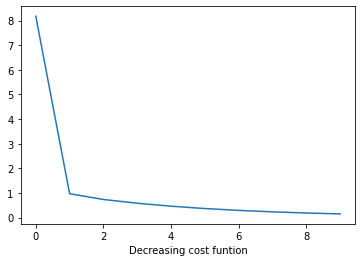

In [61]:
plt.plot(result['Costs'])
plt.xlabel('Decreasing cost funtion')
plt.show()

## Take salary_data to fit the model 

In [69]:
df = pd.read_csv('.\Downloads\Salary_data.csv')

In [110]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


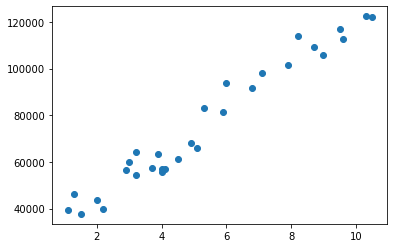

In [111]:
x = df[['YearsExperience']].values
y = df[['Salary']].values
plt.scatter(x,y)

### Standardising the values 

In [112]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x[:] = mmc.fit_transform(x[:])
y[:] = mmc.fit_transform(y[:])

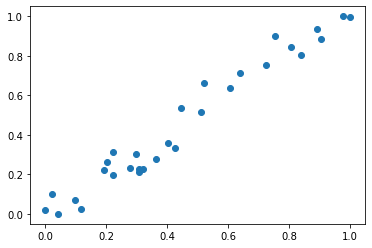

In [113]:
plt.scatter(x,y)

In [114]:
y=y.reshape(1,30)
x=x.reshape(1,30)

### Fitting the model

In [115]:
result = run_model(x,y,0.01,20,2)

Cost after 0 iterations is 0.3057274673007749
Cost after 2 iterations is 0.2832371083262221
Cost after 4 iterations is 0.2628236181764382
Cost after 6 iterations is 0.24429231247741237
Cost after 8 iterations is 0.22746677345881852
Cost after 10 iterations is 0.21218713595935448
Cost after 12 iterations is 0.1983085342604518
Cost after 14 iterations is 0.18569969465742736
Cost after 16 iterations is 0.17424166009316713
Cost after 18 iterations is 0.16382663446258688


In [116]:
result

{'Intercept': 0.1423003498761649,
 'Slope': 0.09899515144696855,
 'Costs': [0.3057274673007749,
  0.2832371083262221,
  0.2628236181764382,
  0.24429231247741237,
  0.22746677345881852,
  0.21218713595935448,
  0.1983085342604518,
  0.18569969465742736,
  0.17424166009316713,
  0.16382663446258688]}

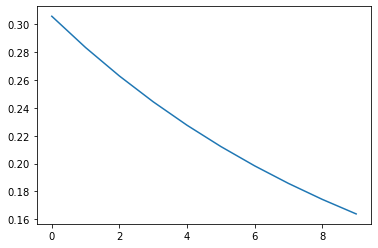

In [118]:
plt.plot(result['Costs'])

### Predicting the values

In [140]:
predict_y = np.array(result['Slope']*x*10 + result['Intercept'])

### Visualising the actual and perdicted values

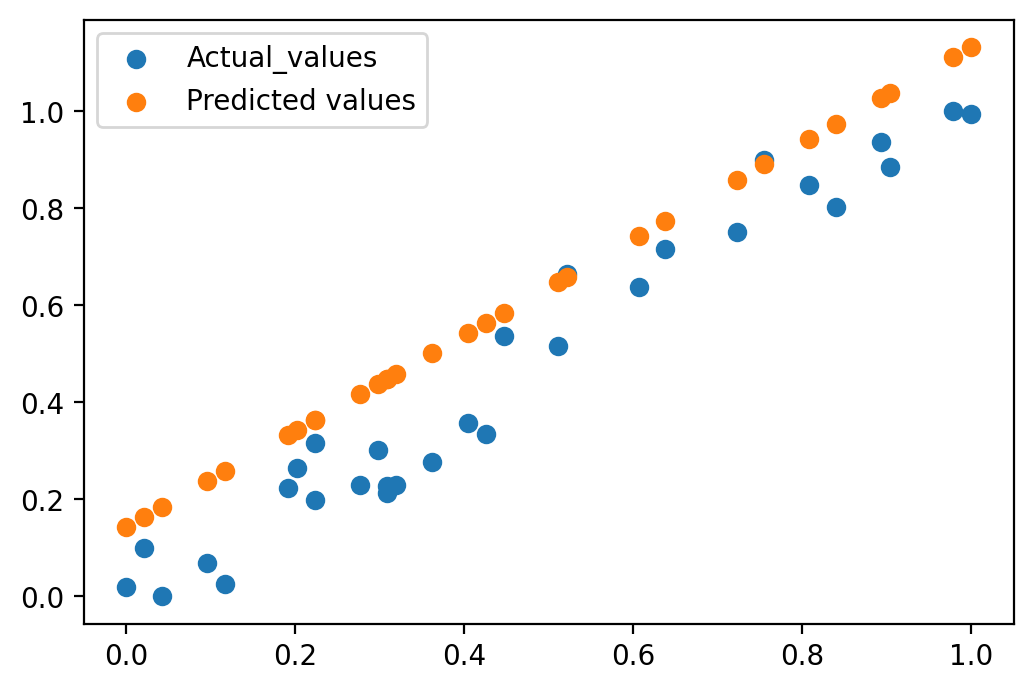

In [146]:
plt.figure(dpi=200)
plt.scatter(x,y,label='Actual_values')
plt.scatter(x,predict_y,label='Predicted values')
plt.legend()

### Thanks for reading till end,
### still having any doubts or suggestions regarding this notebook kindly comment them